In [2]:
import os
import numpy as np
from PIL import Image, ImageChops, ImageEnhance, ImageFilter
import cv2 as cv
from matplotlib import pyplot as plt

In [21]:
from google.colab import files
files.upload()

Saving Sp_D_CRN_A_ani0036_ani0066_0372.jpg to Sp_D_CRN_A_ani0036_ani0066_0372.jpg


{'Sp_D_CRN_A_ani0036_ani0066_0372.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x01\x00H\x00H\x00\x00\xff\xe1\x1d\xd2Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x1c\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x8e\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xa4\x00\x00\x00\xd0\x00\n\xfc\x80\x00\x00\'\x10\x00\n\xfc\x80\x00\x00\'\x10Adobe Photoshop CS2 Windows\x002008:12:28 01:21:36\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x01\x80\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x1e\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01&\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x

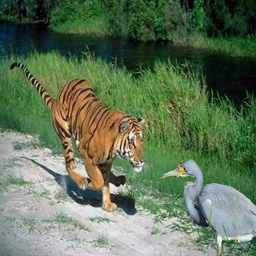

In [23]:
Image.open('Sp_D_CRN_A_ani0036_ani0066_0372.jpg').resize((256,256))

# ELA

In [24]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = 'tempresaved.jpg'
    ELA_filename = 'tempela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality = quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

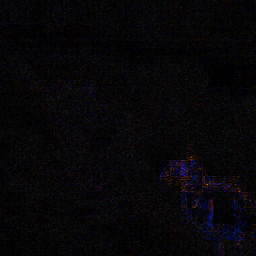

In [26]:
convert_to_ela_image('Sp_D_CRN_A_ani0036_ani0066_0372.jpg', 90).resize((256,256))

# Edge Detection

In [27]:
def detect_edges(path):
  image = Image.open(path)   
  image = image.convert("L") #Converting to greyscale
  image = image.filter(ImageFilter.FIND_EDGES)
  return image

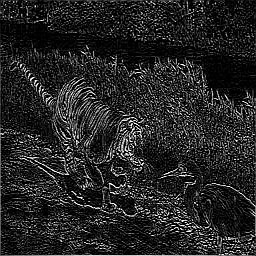

In [28]:
detect_edges('Sp_D_CRN_A_ani0036_ani0066_0372.jpg').resize((256,256))

# Luminance gradient

In [29]:
def luminance_gradient(path):
  img = cv.imread(path,0)
  laplacian = cv.Laplacian(img,cv.CV_64F)
  sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
  sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
  plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
  plt.title('Original'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
  plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
  plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
  plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
  plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
  plt.show()

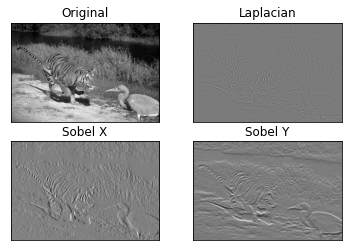

In [30]:
luminance_gradient('Sp_D_CRN_A_ani0036_ani0066_0372.jpg')

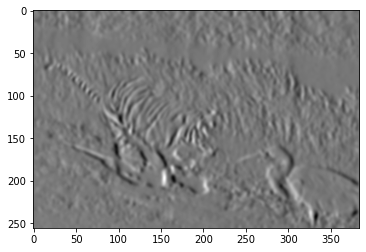

In [31]:
plt.imshow(cv.Sobel(cv.imread('Sp_D_CRN_A_ani0036_ani0066_0372.jpg',0),cv.CV_64F,1,0,ksize=15),cmap='gray')

# Noise Analysis

In [34]:
def noise_analysis(path, quality):
    filename = path
    resaved_filename = 'tempresaved.jpg'
    
    im = Image.open(filename).convert('L')
    im.save(resaved_filename, 'JPEG', quality = quality)
    resaved_im = Image.open(resaved_filename)
    
    na_im = ImageChops.difference(im, resaved_im)
    
    extrema = na_im.getextrema()
    max_diff = max([ex for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = (255.0 / max_diff)
    
    na_im = ImageEnhance.Brightness(na_im).enhance(scale)
    
    return na_im

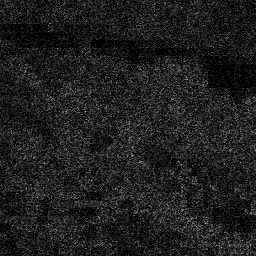

In [35]:
noise_analysis('Sp_D_CRN_A_ani0036_ani0066_0372.jpg', 90).resize((256,256))

#EXIF Data

In [43]:
import PIL.Image
import PIL.ExifTags

In [44]:
img = PIL.Image.open('Sp_D_CRN_A_ani0036_ani0066_0372.jpg')
exif={}

for k, v in img._getexif().items():
  if k in PIL.ExifTags.TAGS:
    exif[PIL.ExifTags.TAGS[k]]=v

In [45]:
exif

{'ColorSpace': 65535,
 'DateTime': '2008:12:28 01:21:36',
 'ExifImageHeight': 256,
 'ExifImageWidth': 384,
 'ExifOffset': 164,
 'Orientation': 1,
 'ResolutionUnit': 2,
 'Software': 'Adobe Photoshop CS2 Windows',
 'XResolution': (720000, 10000),
 'YResolution': (720000, 10000)}

In [ ]:
#XY Resoultions are just the number of pixels per number of inches